# Logistic Regression

# About Dataset
## Context
    :This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## Content
    :Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)


## About All Features
without knowing what our feature is saying we cannot accutally understand our data

###  Number of times pregnant - 
The phrase "number of times pregnant" typically refers to the number of times a woman has been pregnant, regardless of whether those pregnancies resulted in live births, stillbirths, or miscarriages.

### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test - 
Plasma glucose concentration 2 hours after an oral glucose tolerance test (OGTT) is a measure of how effectively your body can handle glucose, or sugar, after consuming a glucose-rich drink.


During an OGTT, you will consume a beverage containing a set amount of glucose, and your blood will be drawn at various time points to measure your blood glucose levels. The 2-hour mark is a particularly important time point because it reflects how well your body is able to regulate blood glucose levels over an extended period.


`If your plasma glucose concentration at 2 hours is elevated, it could be an indication that your body is having difficulty processing glucose and may be a sign of prediabetes or diabetes`. A healthcare professional will interpret your OGTT results in the context of your medical history, physical examination, and other diagnostic tests to determine whether further evaluation or treatment is needed.

 ### Diastolic blood pressure (mm Hg) - 
 Diastolic blood pressure refers to the pressure in your blood vessels when your heart is resting between beats. It is the second and lower number in a blood pressure reading, written as the bottom number.


Blood pressure is measured in millimeters of mercury (mm Hg) and is typically recorded as two numbers: systolic pressure (the top number) and diastolic pressure (the bottom number).


A normal diastolic blood pressure reading is typically around 80 mm Hg or lower. A reading of 90 mm Hg or higher is generally considered high and may indicate hypertension (high blood pressure), which can increase the risk of cardiovascular disease, stroke, and other health problems.

### Triceps skin fold thickness (mm)
Triceps skinfold thickness (TST) is a measurement of the amount of subcutaneous fat (fat located just beneath the skin) in the triceps area. The measurement is taken by pinching a fold of skin and subcutaneous fat using a caliper, usually at the midpoint between the shoulder and elbow on the back of the upper arm. The thickness of the skinfold is then measured in millimeters.

### 2-Hour serum insulin (mu U/ml)

A 2-hour serum insulin test measures the amount of insulin present in the blood two hours after a person consumes glucose. This test is often used to diagnose insulin resistance and diabetes.

### Body mass index (weight in kg/(height in m)^2) -
Body mass index (BMI) is a measure of body fat based on your weight in kilograms divided by the square of your height in meters. It is a commonly used indicator of whether a person has a healthy body weight.

### Diabetes pedigree function
The Diabetes Pedigree Function (DPF) is a mathematical formula used to predict the risk of developing diabetes based on a family history of the disease. The formula takes into account the age at which family members were diagnosed with diabetes and the number of affected relatives in the family.

## **Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for scaling
import pickle # for Pickling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report # for score and confusion matrix
from sklearn.model_selection import GridSearchCV # for hyper parameter tuning
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('D:\Data-Science\Machine_learning\LogisticRegression\LogisticRegresssion_Project\Dataset\diabetes.csv')

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Filling values inplace of Zeros
### Pregnancies will not be filled because Pregnancies can be 0,
### BMI,Insulin,SkinThickness,BloodPressure ,Glucose will be filled because these cannot be zero
 there are many zeros value in my dataset these woulb considered as null So doing something is must with these features

### Glucose Feature

In [16]:
mask = df['Glucose'] == 0
df[mask]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


<Axes: >

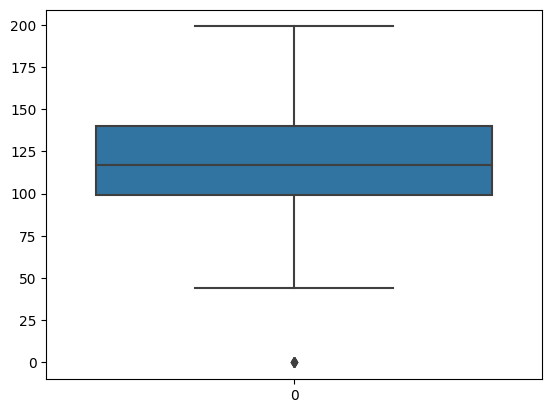

In [17]:
# Checking for outliers
sns.boxplot(df['Glucose'])

### Insights - replacing values with median would be good option


In [18]:
# doing median Imputaion
df['Glucose'] = df['Glucose'].replace(to_replace=0,value=df['Glucose'].mean())

<Axes: >

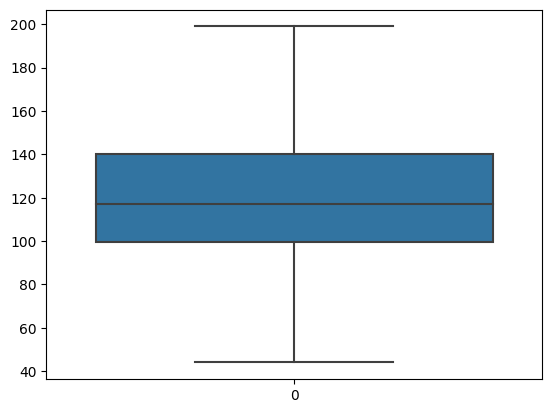

In [19]:
mask = df['Glucose'] == 0
df[mask]
sns.boxplot(df['Glucose'])

# now it is fine

### BloodPressure feature

<Axes: ylabel='BloodPressure'>

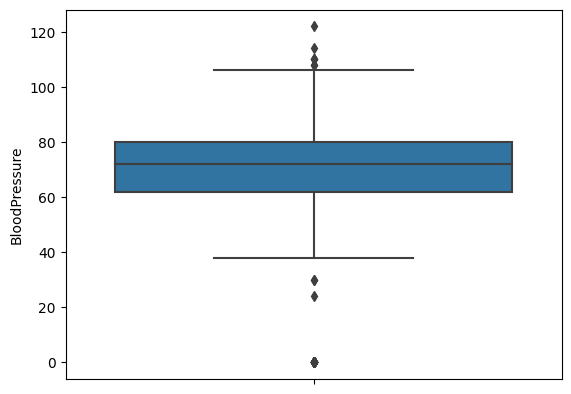

In [20]:
df[df['BloodPressure'] == 0]
sns.boxplot(data=df,y=df['BloodPressure'])

mean- 69.10546875 median- 72.0


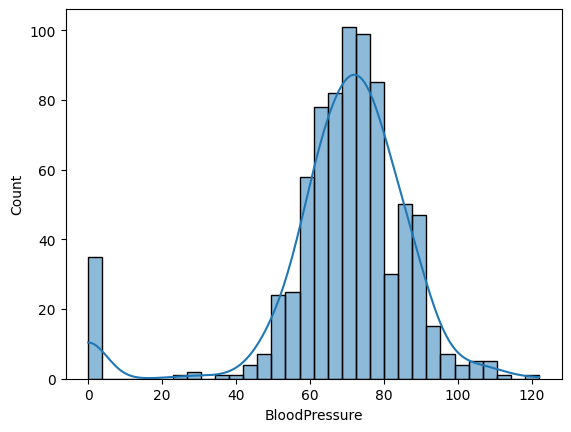

In [21]:
## Before replacing

sns.histplot(data=df,x=df['BloodPressure'],kde=True)
# this is normally distributed so using mean or medain will not effect more
print('mean-',df['BloodPressure'].mean() ,'median-',df['BloodPressure'].median())

In [22]:
df['BloodPressure'] = df['BloodPressure'].replace(to_replace=0,value=df['BloodPressure'].mean())

mean- 72.25480651855469 median- 72.0


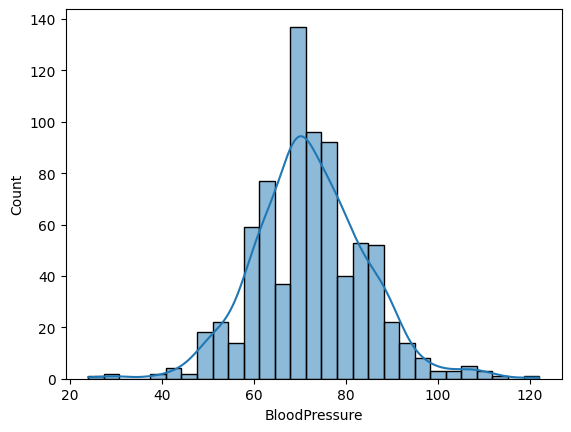

In [23]:
## After replacing

sns.histplot(data=df,x=df['BloodPressure'],kde=True)
# this is normally distributed so using mean or medain will not effect more
print('mean-',df['BloodPressure'].mean() ,'median-',df['BloodPressure'].median())

### BMI feature

In [24]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,0,0,0.0,0.232,54,1
49,7,105.0,69.105469,0,0,0.0,0.305,24,0
60,2,84.0,69.105469,0,0,0.0,0.304,21,0
81,2,74.0,69.105469,0,0,0.0,0.102,22,0
145,0,102.0,75.000000,23,0,0.0,0.572,21,0
371,0,118.0,64.000000,23,89,0.0,1.731,21,0
426,0,94.0,69.105469,0,0,0.0,0.256,25,0
494,3,80.0,69.105469,0,0,0.0,0.174,22,0
522,6,114.0,69.105469,0,0,0.0,0.189,26,0
684,5,136.0,82.000000,0,0,0.0,0.640,69,0


<Axes: >

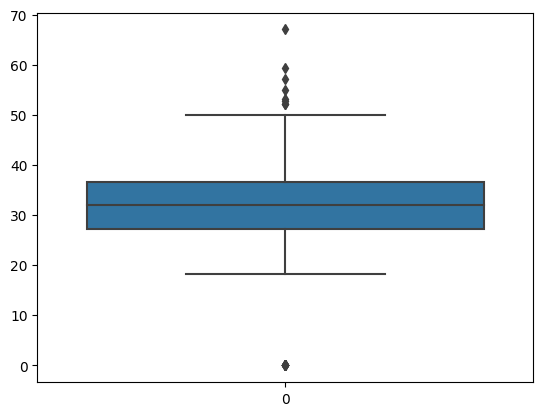

In [25]:
# Checking for Outliers
sns.boxplot(df['BMI'])
# Outliers are in my feature so replacing with median would be good

mean- 31.992578124999998 median- 32.0


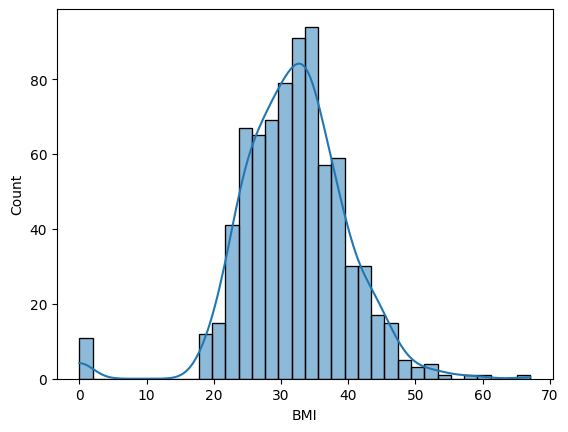

In [26]:
## before replacing

sns.histplot(data=df,x=df['BMI'],kde=True)
# this is normally distributed so using mean or medain will not effect more but Still I will replace Zero's with median
print('mean-',df['BMI'].mean() ,'median-',df['BMI'].median())

mean- 32.45091145833333 median- 32.0


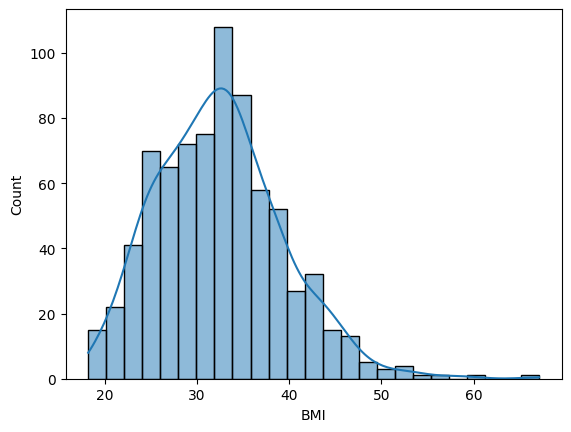

In [27]:
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())
## After replacing

sns.histplot(data=df,x=df['BMI'],kde=True)
# this is normally distributed so using mean or medain will not effect more .
print('mean-',df['BMI'].mean() ,'median-',df['BMI'].median())


### SkinThickness feature

<Axes: title={'center': 'after replacing'}, xlabel='SkinThickness', ylabel='Count'>

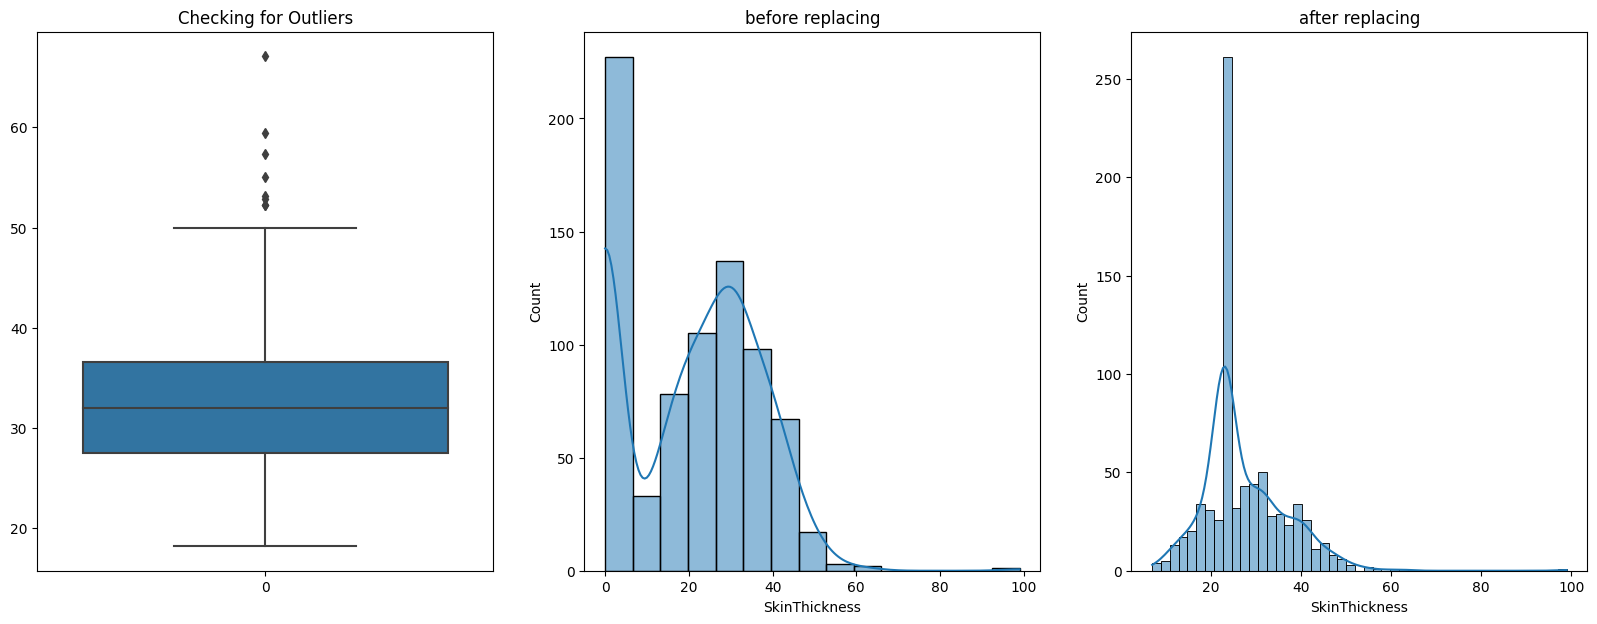

In [28]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(1,3,1)
plt.title('Checking for Outliers')
sns.boxplot(df['BMI'])
plt.subplot(1,3,2)
plt.title('before replacing')
sns.histplot(df['SkinThickness'],kde=True)
plt.subplot(1,3,3)
df['SkinThickness'] = df['SkinThickness'].replace(to_replace=0,value=df['SkinThickness'].median())
plt.title('after replacing')
sns.histplot(df['SkinThickness'],kde=True)

### Insulin feature

<Axes: title={'center': 'after replacing'}, xlabel='Insulin', ylabel='Count'>

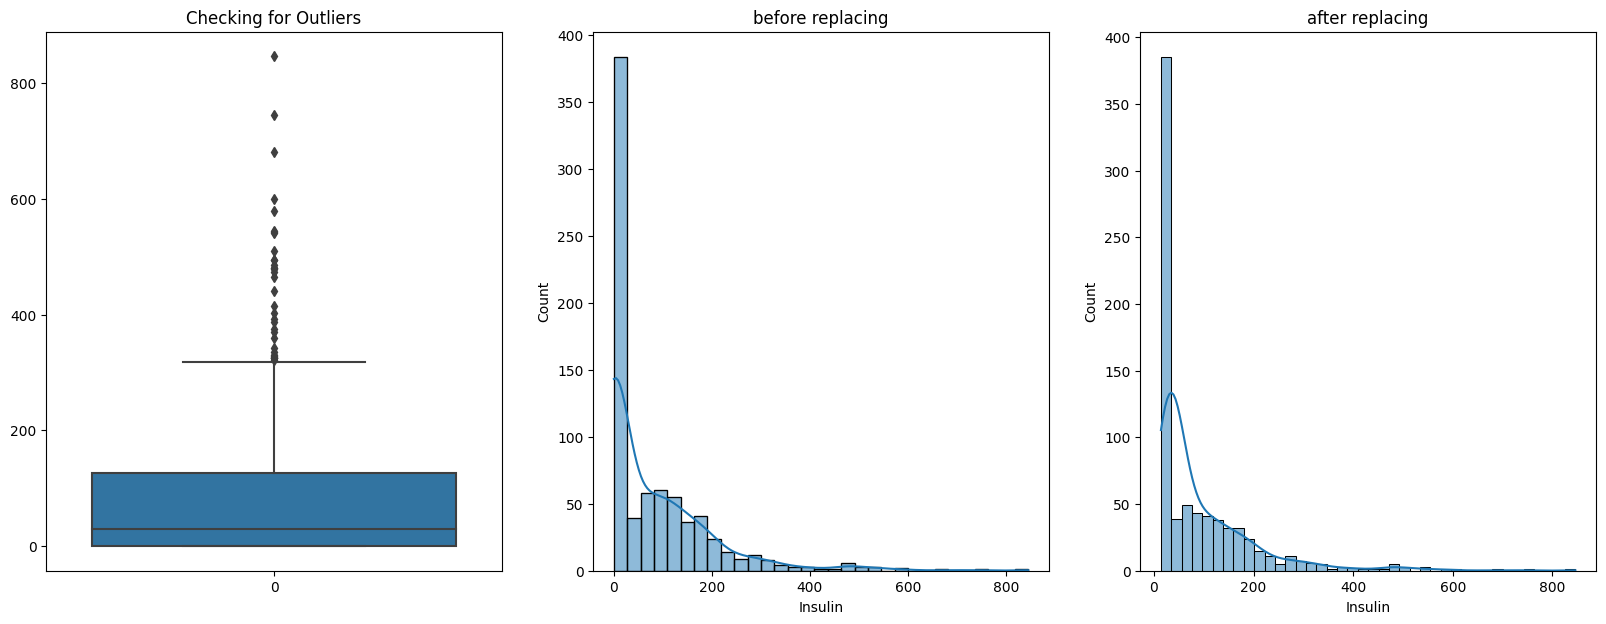

In [29]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(1,3,1)
plt.title('Checking for Outliers')
sns.boxplot(df['Insulin'])
# Outliers are in my feature so replacing with median would be good
plt.subplot(1,3,2)
plt.title('before replacing')
sns.histplot(df['Insulin'],kde=True)
plt.subplot(1,3,3)
df['Insulin'] = df['Insulin'].replace(to_replace=0,value=df['Insulin'].median())
plt.title('after replacing')
sns.histplot(df['Insulin'],kde=True) 

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Model training

In [31]:
# Segregate dependent and independent features
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [32]:
# separate train test
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=0)

In [33]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((576, 8), (576,), (192, 8), (192,))

### Standard Scaling and saving model in pickle file

In [34]:
def standard_scaler(X_train,X_test):
    # scaling the data
    scaler = StandardScaler() # made instance 
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Saving the model
    file = open('D:\Data-Science\Machine_learning\LogisticRegression\LogisticRegresssion_Project\Model\standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [35]:
X_train_scaled,X_test_scaled=standard_scaler(X_train=X_train,X_test=X_test)

In [36]:
X_train_scaled.shape

(576, 8)

### Logistic Regression

In [37]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [38]:
classifier.fit(X=X_train_scaled,y=y_train)


LogisticRegression()

In [39]:
classifier.predict(X_test_scaled)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
accuracy_score(y_test,classifier.predict(X_test_scaled))

0.796875

## Hyper parameter tunining

### GridSearch Cross Validation

In [41]:
# parameters = {
#     'penalty' : ['l1','l2', 'elasticnet', None],
#      'C' : np.logspace(-3,3,7),
#     'random_state' : [3,54,12,10,42,33],
#     'sovler' : ['newton-cg','lbfgs','liblinear']
   
# }

# these parameters must be in tuple not in list
parameters = {'penalty' : ('l1','l2', 'elasticnet', None),
              'C':np.logspace(-3,3,7),
              'solver':('ibfgs','liblinear','newton-cholesky','saga','sag'),
              'random_state': [1,2,4,5,4,3]
              } 

In [42]:
clf_Gridsearch = LogisticRegression()
grid_clf = GridSearchCV(estimator=clf_Gridsearch, # model
                        param_grid= parameters , # hyperparameters
                        scoring='accuracy', # metric for scoring
                        cv=10, # number of folds
                        n_jobs=-1
                        )
grid_clf

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'random_state': [1, 2, 4, 5, 4, 3],
                         'solver': ('ibfgs', 'liblinear', 'newton-cholesky',
                                    'saga', 'sag')},
             scoring='accuracy')

In [43]:
# fitting X_train_scaled,X_test_scaled in grid_clf for best parameters
grid_clf.fit(X_train_scaled,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'random_state': [1, 2, 4, 5, 4, 3],
                         'solver': ('ibfgs', 'liblinear', 'newton-cholesky',
                                    'saga', 'sag')},
             scoring='accuracy')

In [44]:
grid_clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear'}

In [45]:
print(grid_clf.best_score_)


0.763793103448276


### Doing Prediction with my new parameters
I can either make new classifier object with best parameters Or use GridSearchCV instance

In [46]:
y_pred = grid_clf.predict(X_test_scaled)

In [47]:
accuracy_score(y_test,y_pred)

0.796875

In [48]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [49]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [50]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

In [51]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [52]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [53]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



### Saving in pickle file my model

In [55]:
file = open('D:\Data-Science\Machine_learning\LogisticRegression\LogisticRegresssion_Project\Model\classifier.pkl','wb')
pickle.dump(grid_clf,file=file)
file.close()